## Notebook: using jsonstat.py with eurostat api

This Jupyter notebook shows the python library [jsonstat.py](http://github.com/26fe/jsonstat.py) in action.
Eurostat provides a rest api to download its dataset. You can find details about the api [here](http://ec.europa.eu/eurostat/web/json-and-unicode-web-services)
It is possible to use a [query builder](http://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder) to create the uri for the api <img src="eurostat_query_builder_step2.png" width="50%" height="50%"/>

In [1]:
from __future__ import print_function
import os
import pandas as ps
import jsonstat

Download or use the jsonstat file cached on disk. The cache is used to avoid internet download during the devolopment to make the things a bit faster.
You can see the raw data [here](http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&unit=EUR_HAB&indic_na=B1GM)

In [2]:
url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&unit=EUR_HAB&indic_na=B1GM'
file_name = "eurostat-name_gpd_c-geo_IT.json"

file_path = os.path.abspath(os.path.join("..", "tests", "fixtures", "eurostat", file_name))
if os.path.exists(file_path):
    print("using file from fixtures")
else:
    print("download file into the current directory")
    jsonstat.download(url, file_name)
    file_path = file_name

using file from fixtures


Initialize JsonStatCollection from the file and print some info.

In [3]:
collection = jsonstat.JsonStatCollection()
collection.from_file(file_path)

0: dataset 'nama_gdp_c'

In [8]:
nama_gdp_c = collection.dataset('nama_gdp_c')
nama_gdp_c

name:   'nama_gdp_c'
title:  'GDP and main components - Current prices'
size: 69
dimensions:
dim id/name: 'unit' size: '1' role: 'None'
dim id/name: 'indic_na' size: '1' role: 'None'
dim id/name: 'geo' size: '1' role: 'None'
dim id/name: 'time' size: '69' role: 'None'

The only dataset contained is 'nana_gdp_c'. All dimensions are of size 1 exception time. Let's explore time dimension

In [5]:
nama_gdp_c.dimension('time')

index
  pos    idx  label
    0   1946   1946
    1   1947   1947
    2   1948   1948
    3   1949   1949
    4   1950   1950
    5   1951   1951
    6   1952   1952
    7   1953   1953
    8   1954   1954
    9   1955   1955
   10   1956   1956
   11   1957   1957
   12   1958   1958
   13   1959   1959
   14   1960   1960
   15   1961   1961
   16   1962   1962
   17   1963   1963
   18   1964   1964
   19   1965   1965
   20   1966   1966
   21   1967   1967
   22   1968   1968
   23   1969   1969
   24   1970   1970
   25   1971   1971
   26   1972   1972
   27   1973   1973
   28   1974   1974
   29   1975   1975
   30   1976   1976
   31   1977   1977
   32   1978   1978
   33   1979   1979
   34   1980   1980
   35   1981   1981
   36   1982   1982
   37   1983   1983
   38   1984   1984
   39   1985   1985
   40   1986   1986
   41   1987   1987
   42   1988   1988
   43   1989   1989
   44   1990   1990
   45   1991   1991
   46   1992   1992
   47   1993   1993
   48   1994  

Value for oecd(area:IT,year:2012)

In [11]:
nama_gdp_c.value(time='2012')

25700

In [13]:
df = nama_gdp_c.to_data_frame('time', geo='IT')
print(df)

         IT
1946    NaN
1947    NaN
1948    NaN
1949    NaN
1950    NaN
1951    NaN
1952    NaN
1953    NaN
1954    NaN
1955    NaN
1956    NaN
1957    NaN
1958    NaN
1959    NaN
1960    NaN
1961    NaN
1962    NaN
1963    NaN
1964    NaN
1965    NaN
1966    NaN
1967    NaN
1968    NaN
1969    NaN
1970    NaN
1971    NaN
1972    NaN
1973    NaN
1974    NaN
1975    NaN
...     ...
1985    NaN
1986    NaN
1987    NaN
1988    NaN
1989    NaN
1990  15800
1991  17100
1992  17300
1993  15400
1994  15700
1995  15200
1996  17500
1997  18600
1998  19200
1999  19900
2000  21000
2001  22000
2002  22800
2003  23300
2004  24000
2005  24500
2006  25300
2007  26200
2008  26300
2009  25200
2010  25700
2011  26000
2012  25700
2013  25600
2014    NaN

[69 rows x 1 columns]


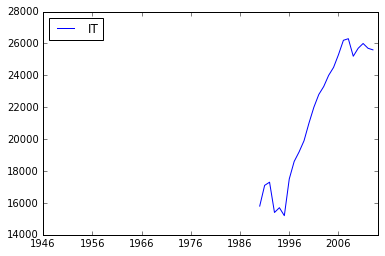

In [14]:
import matplotlib as plt
%matplotlib inline
df.plot()

## Using two dimension with size > 1
Download or use the jsonstat file cached on disk. The cache is used to avoid internet download during the devolopment to make the things a bit faster.
You can see the raw data [here](http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&geo=FR&unit=EUR_HAB&indic_na=B1GM)

In [15]:
url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&geo=FR&unit=EUR_HAB&indic_na=B1GM'
file_name = "eurostat-name_gpd_c-geo_IT_FR.json"

file_path = os.path.abspath(os.path.join("..", "tests", "fixtures", "eurostat", file_name))
if os.path.exists(file_path):
    print("using file from fixtures")
else:
    print("download file into the current directory")
    jsonstat.download(url, file_name)
    file_path = file_name

using file from fixtures


In [18]:
collection = jsonstat.JsonStatCollection()
collection.from_file(file_path)
nama_gdp_c = collection.dataset('nama_gdp_c')
nama_gdp_c

name:   'nama_gdp_c'
title:  'GDP and main components - Current prices'
size: 138
dimensions:
dim id/name: 'unit' size: '1' role: 'None'
dim id/name: 'indic_na' size: '1' role: 'None'
dim id/name: 'geo' size: '2' role: 'None'
dim id/name: 'time' size: '69' role: 'None'

In [19]:
nama_gdp_c.dimension('geo')

index
  pos    idx  label
    0     FR France
    1     IT  Italy

In [21]:
nama_gdp_c.value(time='2012',geo='IT')

25700

In [22]:
nama_gdp_c.value(time='2012',geo='FR')

25200

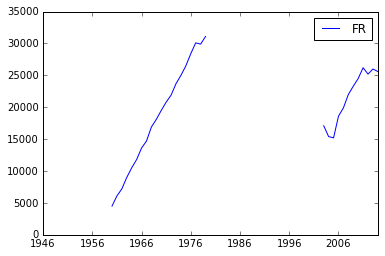

In [23]:
df = nama_gdp_c.to_data_frame('time', geo='FR')
df.plot()